In [1]:
# All Libraries importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
pd.set_option('display.max_columns', 200)

## Loading the data and performing EDA(Exploratory Data Analysis)

In [3]:
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Survival Rate by gender in percentage
survival_gender = titanic.groupby("Sex")["Survived"].mean()*100
survival_gender

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

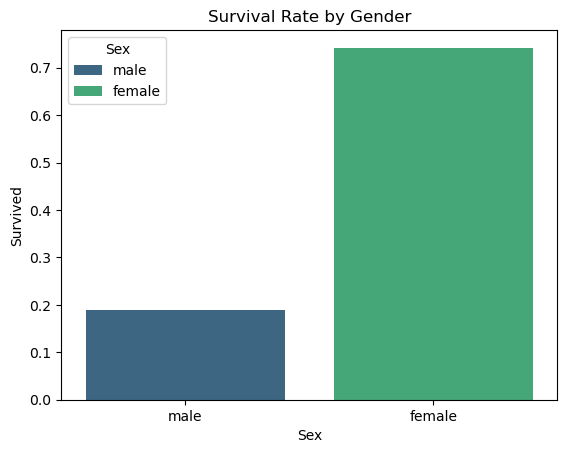

In [12]:
# Visualising survival_gender
sns.barplot(x='Sex', y='Survived', data=titanic, errorbar=None,palette="viridis", hue="Sex", legend=True)
plt.title("Survival Rate by Gender")
plt.ylabel("Survived")
plt.savefig('sur_gender.png')
plt.show();


In [10]:
# Survival rate by passenger class
survival_pclass = titanic.groupby("Pclass")["Survived"].mean()
survival_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

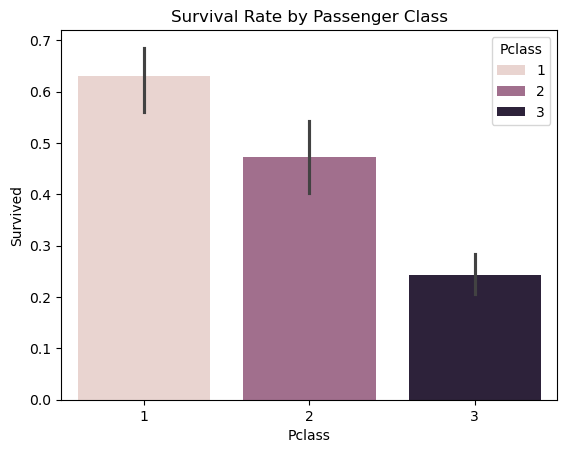

In [11]:
sns.barplot(x="Pclass", y="Survived", data=titanic, hue="Pclass", legend=True)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survived")
plt.show();

In [12]:
# Survivor and Non-Survivor Age distribution
Survivor_age = pd.crosstab(titanic.Survived, titanic.Age)
Survivor_age

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,14.50,15.00,16.00,17.00,18.00,19.00,20.00,20.50,21.00,22.00,23.00,23.50,24.00,24.50,25.00,26.00,27.00,28.00,28.50,29.00,30.00,30.50,31.00,32.00,32.50,33.00,34.00,34.50,35.00,36.00,36.50,37.00,38.00,39.00,40.00,40.50,41.00,42.00,43.00,44.00,45.00,45.50,46.00,47.00,48.00,49.00,50.00,51.00,52.00,53.00,54.00,55.00,55.50,56.00,57.00,58.00,59.00,60.00,61.00,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,1,2,2,6,2,3,0,0,3,1,1,11,7,17,16,12,1,19,16,10,1,15,1,17,12,7,18,2,12,15,2,9,9,1,9,9,1,7,11,1,5,6,9,7,2,4,7,4,6,7,2,3,8,3,2,5,5,3,0,5,1,1,2,2,2,2,2,3,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,2,1,2,2,0,1,1,2,3,0,4,6,6,9,9,3,0,5,11,5,0,15,0,6,6,11,7,0,8,10,0,8,9,1,6,6,0,11,11,0,1,5,5,6,0,2,6,1,3,5,0,0,1,6,4,5,2,3,1,3,1,0,2,0,3,0,2,0,2,2,0,0,0,0,0,0,0,1


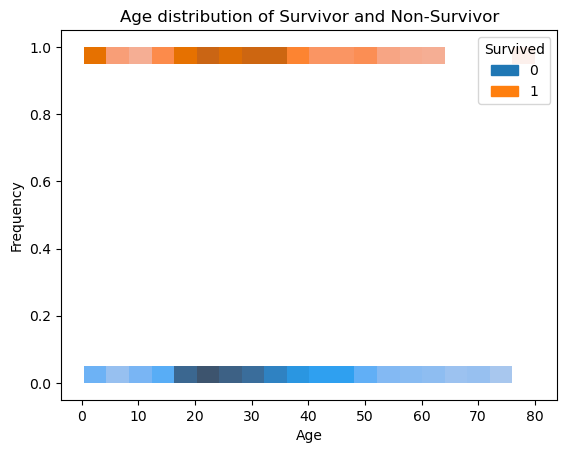

In [13]:
# Survivor and Non-Survivor Age distribution
sns.histplot(x="Age", y="Survived", data=titanic, hue="Survived", bins=20, kde=True, legend=True)
plt.title("Age distribution of Survivor and Non-Survivor")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show();

In [14]:
survived_embarked = pd.crosstab(titanic.Survived, titanic.Embarked)
survived_embarked

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [15]:
survivor_embarked = titanic.groupby("Embarked")["Survived"].mean()
survivor_embarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

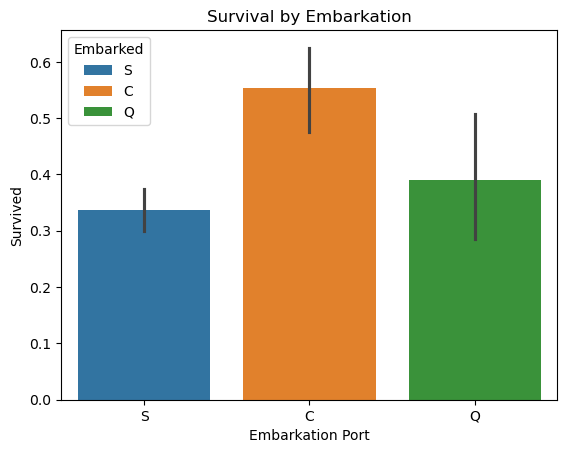

In [16]:
sns.barplot(x="Embarked", y="Survived", data=titanic, hue="Embarked")
plt.title("Survival by Embarkation")
plt.ylabel("Survived")
plt.xlabel("Embarkation Port")
plt.show();

In [17]:
# Effect of family size on survival
titanic["familySize"] = titanic["SibSp"] + titanic["Parch"]
titanic["familySize"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: familySize, Length: 891, dtype: int64

In [18]:
family_survival = titanic.groupby("familySize")["Survived"].mean() * 100
family_survival

familySize
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64

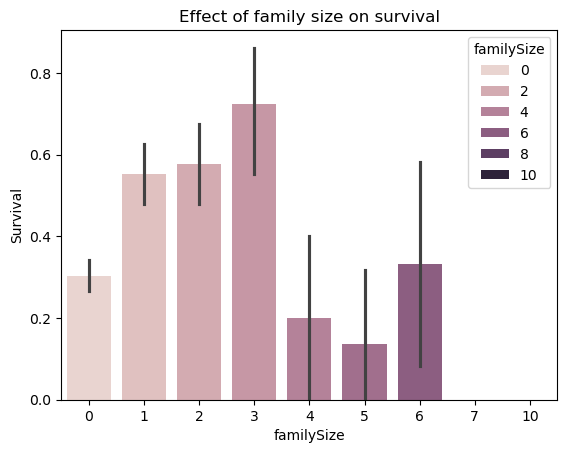

In [20]:
sns.barplot(x="familySize", y="Survived", data=titanic, hue= "familySize")
plt.title("Effect of family size on survival")
plt.ylabel("Survival")
plt.show();

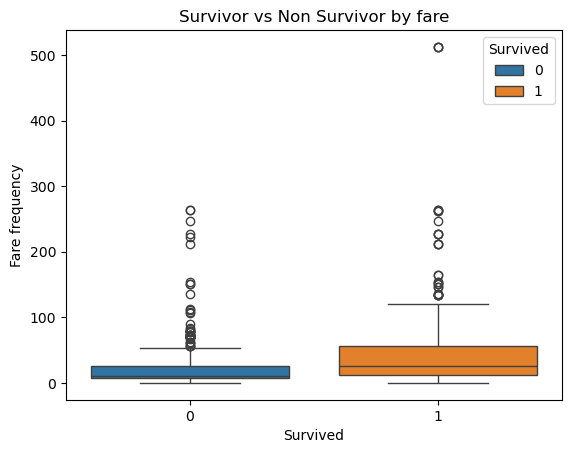

In [19]:
# Survivor by fare
sns.boxplot(x="Survived", y="Fare", data=titanic, hue="Survived")
plt.title("Survivor vs Non Survivor by fare")
plt.ylabel("Fare frequency")
plt.show();

In [21]:
corr_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'familySize']
new_corr = titanic[corr_columns].corr()
new_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
familySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


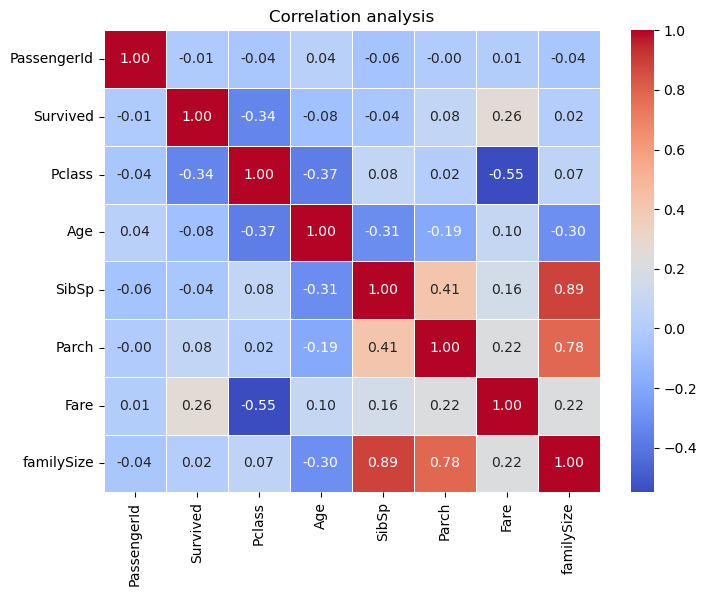

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(new_corr, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm' )
plt.title("Correlation analysis")
plt.show();

In [23]:
# Survival Rate by Title
titanic["Title"] = titanic["Name"].str.extract(" ([A-Za-z]+)\.", expand=False);

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_3948/2598901192.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic["Title"] = titanic["Name"].str.extract(" ([A-Za-z]+)\.", expand=False);


In [24]:
title_survived = titanic.groupby("Title")["Survived"].mean()
title_survived

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [25]:
survived_title = pd.crosstab(titanic.Survived, titanic.Title)
survived_title

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [26]:
embarked_title = pd.crosstab(titanic.Embarked, titanic.Title)
embarked_title

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Embarked,,,,,,,,,,,,,,,,,
C,0,1,0,1,2,0,1,0,5,38,2,1,85,31,0,0,1
Q,0,0,0,0,1,0,0,0,4,33,0,0,35,3,0,1,0
S,1,1,1,0,4,1,0,2,31,110,0,0,397,90,1,5,0


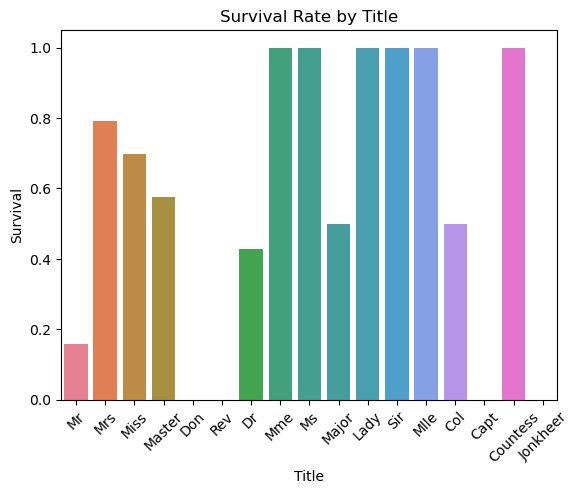

In [26]:
sns.barplot(x="Title", y="Survived", data=titanic, errorbar=None ,hue="Title")
plt.xticks(rotation = 45)
plt.title("Survival Rate by Title")
plt.ylabel("Survival")
plt.xlabel("Title")
plt.show()

In [28]:
## Survivor by age group
titanic["AgeGroup"] = pd.cut(titanic["Age"], bins=[0,12,18,60,100], labels=["Child", "Ten", "Adult", "Senior"])
age_group_survivor = titanic.groupby("AgeGroup", observed=False)["Survived"].mean()
age_group_survivor

AgeGroup
Child     0.579710
Ten       0.428571
Adult     0.388788
Senior    0.227273
Name: Survived, dtype: float64

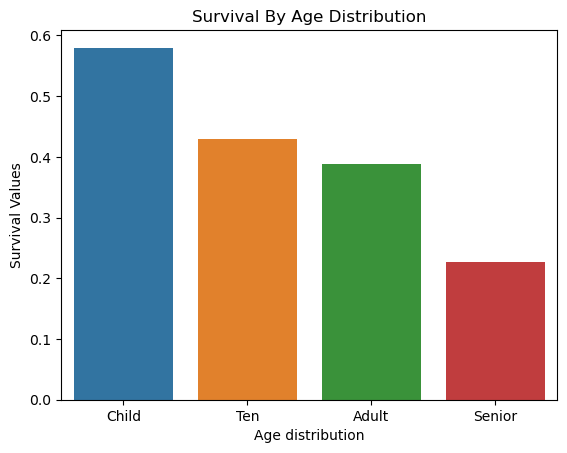

In [30]:
sns.barplot(x=age_group_survivor.index, y=age_group_survivor.values, hue=age_group_survivor.index)
plt.title("Survival By Age Distribution")
plt.ylabel("Survival Values")
plt.xlabel("Age distribution")
plt.show();

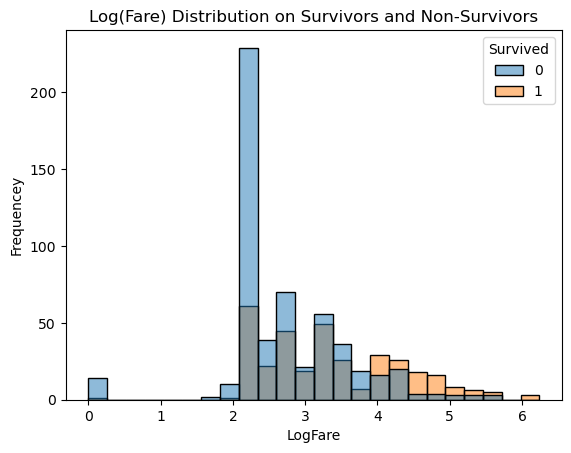

In [34]:
titanic["LogFare"] = titanic["Fare"].apply(lambda x: np.log(x +1 ))

## Visualization the logic
sns.histplot(data=titanic, x="LogFare", hue="Survived")
plt.title("Log(Fare) Distribution on Survivors and Non-Survivors")
plt.xlabel("LogFare")
plt.ylabel("Frequencey")
plt.show();

## Handling Missing data

In [38]:
titanic["Age"] = titanic.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))
titanic["Embarked"] = titanic.fillna(titanic["Embarked"].mode(), inplace=True)

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familySize,Title,AgeGroup,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28.0,None,1,Mr,Adult,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,None,1,Mrs,Adult,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28.0,None,0,Miss,Adult,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,None,1,Mrs,Adult,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,28.0,None,0,Mr,Adult,2.202765
